# The non-linear convection problem

## Questions imposed by the problem
- What is the final velocity profile for 1D linear convection when the initial conditions are a $\textbf{square wave}$ and the boundary conditions are $\textbf{constant}$ ?

- The linear convection phenomena is described by the following equation:

\begin{equation}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
\end{equation}

### Remarque
- We shall see that this equation generates discontuities($\Rightarrow$ shocks)
- If $c > 0$ the initial solution is being convected to the right, else it is being convected to the left.

## Formulate the problem

### Input Data

- nt = 51 (number of temporal points)

- nx = 21 (number of spatial points)

- tmax = 0.5

- xmax = 2

- We require a square wave as initial condition:
    - Initial conditions:  
    \begin{equation}
    u(x, t = 0) = \left\{\begin{matrix} 2 & 0.5 \leq x \leq 1\\  1 & \textrm{else} \end{matrix}\right.
    \end{equation}
    
    - Boundary conditions: 
    \begin{equation}
    u(x = \{0,2\}, t) = 1.0
    \end{equation}

### Output data

We want to compute the solution $u(x,t)$ elsewhere.

## Algorithm for problem solving

### Numerical scheme (FTBS)
- Forward diffrence in Time
- Backward difference in Space

### Discretization and Transposition
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} + u^{n}_{i} \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x} = 0
\end{equation}
After transposition, we get:
\begin{equation}
u^{n+1}_{i}  = u^{n}_{i} - \sigma u^{n}_{i}(u^{n}_{i} - u^{n}_{i-1})
\end{equation}
With: 
\begin{equation}
\:\: \sigma = \frac{\Delta t}{\Delta x}
\end{equation}

### Pseudo Code

In [ ]:
# Define Constantes:
nt = 51
nx = 21 
tmax = 0.5
xmax = 2

dx = xmax/(nx-1)
dt = tmax/(nt-1)

sigma = dt/dx

# Boundary conditions:
for between 0 and nt-1; u(0, t) = u(2, t) = 1.0

# Initial conditions:
for i between 0 and nx-1; 
    if 0.5 <= x <= 1.0; u(x, 0) = 2.0
    else; u(x,0) = 1.0

# Solution:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*u(n, i)*(u(n, i) - u(n, i-1))

### Python Implementation

In [14]:
def non_linear_convection(tmax, xmax, nt, nx):
    
    import numpy as np
    
    # Grid parameters 
    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    x = np.linspace(0, xmax, nx)
    
    # Constants 
    sigma = dt/dx
    
    # Definition of solution containers:
    u = np.ones((nt, nx))

    # Initial conditions
    for i in range(nx):
        if (0.5 <= x[i] <= 1.0):
            u[0, i] = 2.0
    
    # Boundary conditions: They are automatically included.
    
    # Solution:
    for n in range(nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] - sigma*u[n, i]*(u[n, i] - u[n, i-1])
    
    return x, u

In [15]:
def Plotter(x, u, tmax, xmax, nx, nt, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    CFL = dt/dx 
    CFL = float(round(CFL, 3))
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], label = "Numerical Solution, CFL = {:}".format(CFL))
    
    
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

### Many instances plotter:

In [25]:
def Plotter_2(x, u, tmax, xmax, nx, nt):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    CFL = dt/dx 
    CFL = float(round(CFL, 3))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    for iteration in range(0, nt, 10):
        
        t = iteration*dt
        t = float(round(t, 2))
        
        ax.plot(x, u[iteration, :], label = "t = {:}".format(t))
    
    ax.set_title("Numerical solution for CFL = {:}".format(CFL))
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t)")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

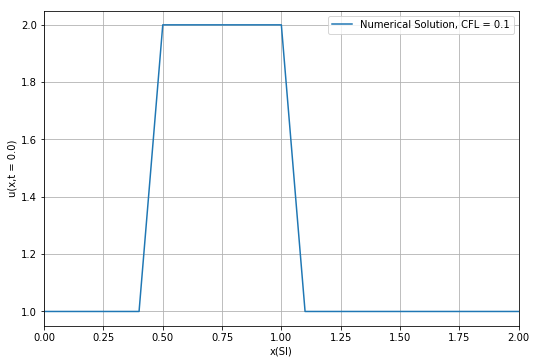

In [26]:
(tmax, xmax, nt, nx) = (0.5, 2.0, 51, 21)
x, u = non_linear_convection(tmax, xmax, nt, nx)
Plotter(x, u, tmax, xmax, nx, nt, iteration = 0)

## Comments
- As we can see, the initial conditions are not a perfect square wave as the number of spatial points is minimal in the scheme !

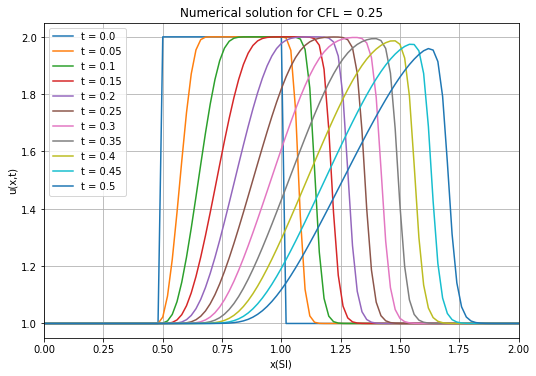

In [38]:
(tmax, xmax, nt, nx) = (0.5, 2.0, 101, 101)
x, u = non_linear_convection(tmax, xmax, nt, nx)
Plotter_2(x, u, tmax, xmax, nx, nt)

## Comments
- The solution is indeed convected to the right as expected but it is also strongly diffused ! $\Rightarrow$ The Backward differencing in space creates false diffusion and it amplifies as the CFL number goes smaller.

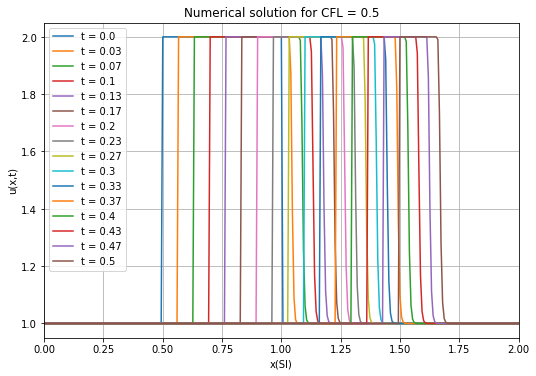

In [28]:
(tmax, xmax, nt, nx) = (0.5, 2.0, 151, 301)
x, u = non_linear_convection(tmax, xmax, nt, nx)
Plotter_2(x, u, tmax, xmax, nx, nt)

## Comments
- When the spatial step is reduced (Number of grid points increased), the error reduces !
- A perfect solution is obtained when the CFL number is unity, that is when the distance travelled by the solution between two instants of time is exactly equal to the distance between two consecutive meshpoints:
\begin{equation}
c \frac{\Delta t}{\Delta x} = 1/2
\end{equation}

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


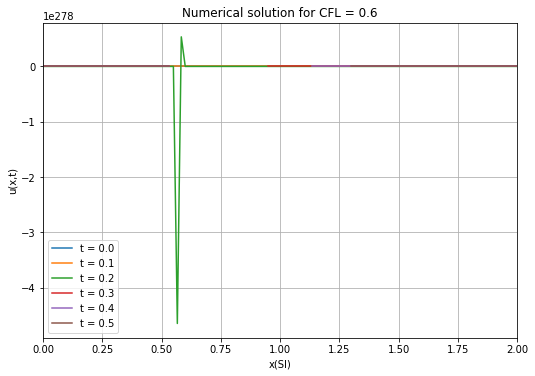

In [39]:
(tmax, xmax, nt, nx) = (0.5, 2.0, 51, 121)
x, u = non_linear_convection(tmax, xmax, nt, nx)
Plotter_2(x, u, tmax, xmax, nx, nt)

## Comments
- When the CFL number becomes greater than one half, the scheme is totally unstable !